# Statistical Distribtions

## Definitions of the following terms
(Useful references for this notebook. )
1. [probability distribution functions (PDF)](https://en.wikipedia.org/wiki/Probability_distribution)
1. [cumulative distribtion functions (CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) 



## The Gaussian Distribtion (PDF)

The Gaussian (A.K.A. Normal) distribution is the most wellknown statistical distibtion.   It provides a good description of many experimental results.  It's PDF can be represnted as 
$$ \phi(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2} \left(\frac{(x-\mu)}{\sigma}\right)^2 } $$ where $\mu$ is the mean, and $\sigma$ is the standard deviation.  We will define the mean and standard deviation below.


Python makes it easy to generate realizations of data from a wide variety of statical distribtions.  (see [Numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html))

## A realization of a Gaussian noise
Lets start by generating a ralization of gaussian noise comparing it to the analytic form above. 

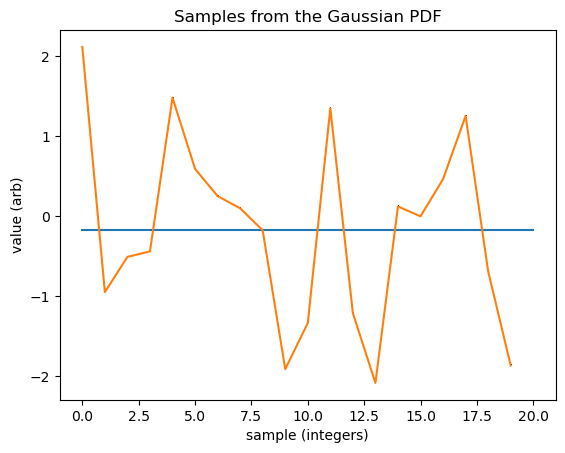

In [2]:
## import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## generate a realization of N samples following a gaussian distribtion with zero mean and unit variance
N = 20
data = np.random.randn(N)

## plot this realization 
plt.plot(data,",k")
plt.title("Samples from the Gaussian PDF")
plt.xlabel("sample (integers)")
plt.ylabel("value (arb)")

## plot a line showing the mean, and the random data
mean = np.mean(data)
plt.plot(np.array([0,N]),np.array([1,1])* mean )
plt.plot(np.arange(N),data)

plt.show()

## Excercises
1. Overplot lines at +/- 1 sigma, and the +/- 2 sigma level
1. Increase the number of samples by a factor of 10, then 100, and then 1000 and see how this looks. 
1. If presented with guassian data, could you read the standard deviation off the plot?  Note: the variance and standard deviation of a gaussin are the same.

## Histograms and recovering distribtions from samples

If we have a realization of noise, we often want to determine its PDF.  We can do this by counting the number of samles in a given range and plotting the number as a fuciton of the central value for that range.  This is dedined as a histogram.  Python makes it easy to compute this.  We will now do this for our example above.

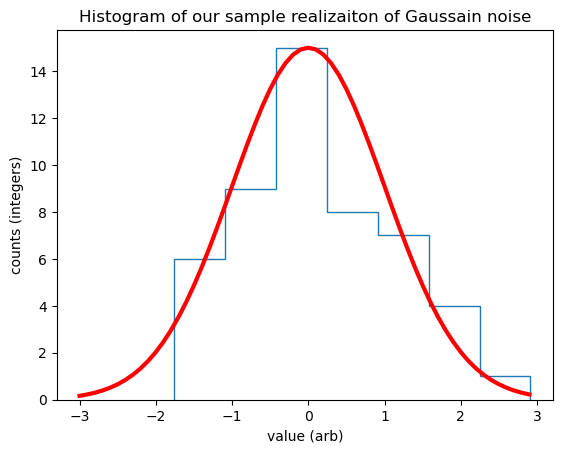

In [3]:
## regenerate a realizaiton of the random noise
N = 50
data = np.random.randn(N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")
plt.stairs(counts, bins)

#plt.hist(, bins='auto')

## overplot the analytic form of a gaussin, guess the ampltude 
A = np.max(counts)
sigma = 1
x = np.arange(-3,3,0.1)
Gaussian = A *np.exp(-0.5*(x/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)
plt.title("Histogram of our sample realizaiton of Gaussain noise")
plt.ylabel("counts (integers)")
plt.xlabel("value (arb)")
plt.show()

## Exercises
1. Re-run this code multiple times to generate new realizations of the Gaussian noise.  Note how in the limit of a small sample size (N=5 was the default) the agreement between the PDF is hard to estimate
1. Increase the sample size by factors of 10.  At what sample size does the distribtion become unambigous?  What sample size is required to know the distibution to 1%?

## Confidence intervals

If we normalze the area under the probability distribtion to 1 (e.g., $\int P(x) dx = 1$) then we can compute intervals which contain a given fraction of the probability.  Below we compute the fraction of the probabilty contained within the +/- 1 $\sigma$ interval for a gaussain PDF.

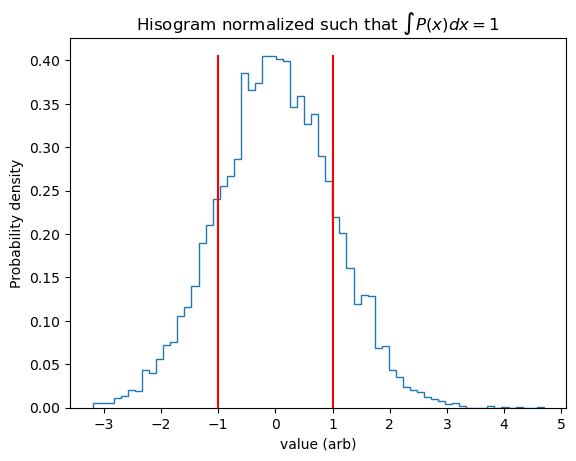

probability contained within +/-  1 of the mean is:  0.7002
the probability outside the interval is:  0.29979999999999996


In [4]:
## regenerate a realizaiton of the random noise
N = 10000
data = np.random.randn(N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")

## noramlize the hisogram
dx = bins[1] - bins[0] ## this is the width of the bins
counts = counts / np.sum(counts*dx)

## plot the normalized histogram
plt.stairs(counts, bins)
plt.title("Hisogram normalized such that $\int P(x) dx = 1$")
plt.ylabel("Probability density")
plt.xlabel("value (arb)")

## draw vertical linse at the +/- n_sigma, note this is normalized to have unit variance

n_sigma = 1  ## <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<. CHANGE THIS!!!
plt.plot(np.array([1,1])*n_sigma*-1,np.array([0,1])*np.max(counts),"r")
plt.plot(np.array([1,1])*n_sigma,np.array([0,1])*np.max(counts),"r")

## compute the area contained widhtin these limits

## this line figures out which data is in the interval
in_interval = np.where(np.logical_and(bins > -n_sigma,bins <n_sigma))
## this computes the integral over that range
integrated_probability = np.sum(counts[in_interval]*dx)

plt.show()

print("probability contained within +/- ",n_sigma,
      "of the mean is: ",integrated_probability)
print("the probability outside the interval is: ", 1-integrated_probability
     )


## Excercise

1. Fill out this table given the probability contaned within 1,2,3,4, and 5 sigma interales as well as the probability outside these intervals.  You might want to increase the "N" value, to get more accurate statistics.
|$\pm sigma$  | P(inside) | P(outside)| 
| --- | --- | --- |
|$\pm 1 \sigma$| XX | XX |
|$\pm 2 \sigma$| XX | XX |
|$\pm 3 \sigma$| XX | XX |
|$\pm 4 \sigma$| XX | XX |
|$\pm 5 \sigma$| XX | XX | 
1. Are all of these estimates believable?  Explain.

Note-- You can also calculate this analytically, but this might be a more intuitive example confidence intervals, and how to generalize them to other distribtions.  For Gaussain distribtions the confidence intervals are related to the variance, for other distribtions the relatinship may be more complciated.   This shows how (for Gaussian PDFs) the confidence intervals are realted to probability.  For refernce $5 \sigma$ should be about 1 in a million.

# Fitting

We often want to fit a model to data.  In many situations the model is defined parametricly by a fuciton $f(x|p)$ defined by one or more parameters p.  Here x is the independant variable(s) which paramterizes the samplng of the experiment.  The fitting procedure requires finding p which best approximate the data $d_i(x_i)$.  Here best is defined by some reasonable metric which could be the likelihood (or other probability distribution), $\chi^2$. 

Since this problem is such a common concern there are vast libraries we can draw from. [Optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) is a convenient library is included in scipy.  Take a moment to read through the many functions included in it.  

In what follows we will first play with the minimiation codes on a toy example with two local and one global maxima.  After playing with a few example fitting routines we will shift to a paramter estimation (fitting) problem. 


## Curve fitting

In this example lets fit a Gaussian to a data set.  We could write a funciton that returns the probability of the data given the model, or chi-squared, and then pass this to a minimizaiton code.  Instead, here we do a related alternative, which is to use an existing [least-squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) code to fit the model.

Lets make another random data set, with N data points, but now offset from 0 mean. 

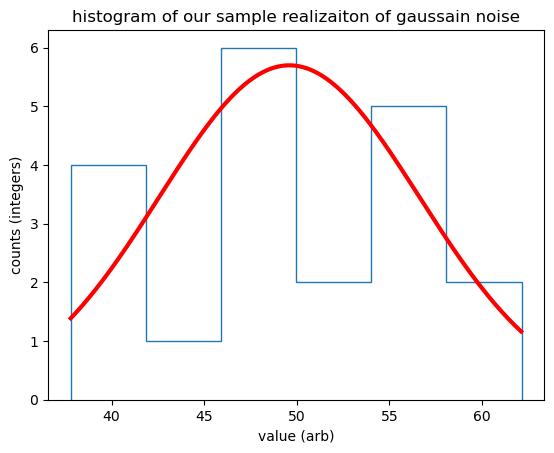

In [11]:
## regenerate a realization of the random noise
N = 20
data = np.random.chisquare(50,N)

## make and plot a histrogam
counts, bins = np.histogram(data,bins="auto")
plt.stairs(counts, bins)
#plt.hist(, bins='auto')

## Overplot the analytic form of a gaussin, with a crude guess for the ampltude 
A = np.max(counts)*0.95
sigma = np.std(data)
x = np.arange(np.min(bins),np.max(bins),(np.max(bins) - np.min(bins))/1000.)
Gaussian = A *np.exp(-0.5*((x-np.mean(data))/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)
plt.title("histogram of our sample realizaiton of gaussain noise")
plt.ylabel("counts (integers)")
plt.xlabel("value (arb)")
plt.show()

### Scipy.Stats

One option would be to characterize the distribution of data points using the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) norm function, then use those to overplot a curve that best matches the data.

In [12]:
from scipy.stats import norm

# Fit a Gaussian / normal distribution to the data
(mu, sigma) = norm.fit(data)
# The error on the mean, is the std-dev divided by the sqrt(N-points).
mu_err = sigma/np.sqrt(N)

#print Statistics for the sample
print("Fit parameters: ")
print("=====================================================")
print("Mean = ", mu, "+-",mu_err)
print("Std-dev =", sigma)

Fit parameters: 
Mean =  49.5979175047273 +- 1.5706506189565097
Std-dev = 7.024163105777752


We can then re-overplot this fit on our data, where we normalize the histogram so that the integral is 1 (i.e., so that it approximates the probability distribution function, or pdf).

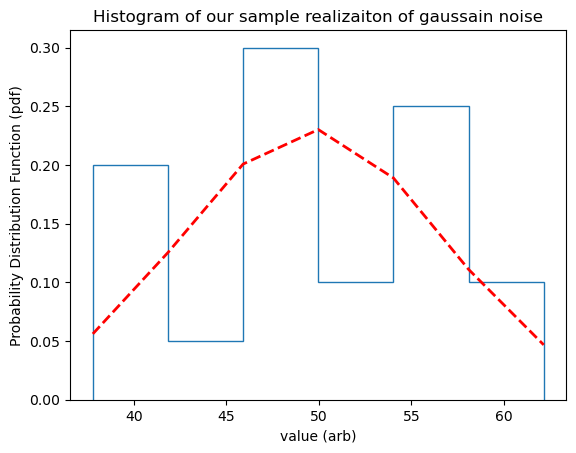

In [13]:
plt.stairs(counts/sum(counts), bins)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
bs = bins[1]-bins[0]
l = plt.plot(bins, y*bs, 'r--', linewidth=2)

plt.title("Histogram of our sample realizaiton of gaussain noise")
plt.ylabel("Probability Distribution Function (pdf)")
plt.xlabel("value (arb)")
plt.show()

### Fit the Histogram Directly Using Curve-fit

This wouldn't be as accurate as the above (i.e., because we are losing information in the histogram binning process), but we could also fit the histogram directly using [curve_fit](https://docs.scipy.org/doc/scipy/reference/optimize.html#).  Curve-fit has the advantage that we can simultaneously fit for uncertainty on the fit parameters using the covariance matrix.

In [14]:
from scipy.optimize import curve_fit

#Calculate the "middle" of each histogram bin, which is the "x-array" for our fit.  Counts is the y-array.
n = len(counts)
bins_mid=np.zeros((n),dtype=float) 
for ii in range(n):
    bins_mid[ii]=(bins[ii+1]+bins[ii])/2

#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(x, a, x_mean, sigma):
    return a*np.exp((x-x_mean)**2/(-2*sigma**2))

#Estimate the mean and sigma from the Histogram data points only
mean = sum(bins_mid*counts)/sum(counts)                  
sigma = np.sqrt(sum(counts*(bins_mid-mean)**2)/sum(counts))
#print, max(counts), mean, sigma

#Gaussian least-square fitting process
param,param_cov_matrix = curve_fit(gaus,bins_mid,counts,p0=[max(counts),mean,sigma],maxfev=5000)

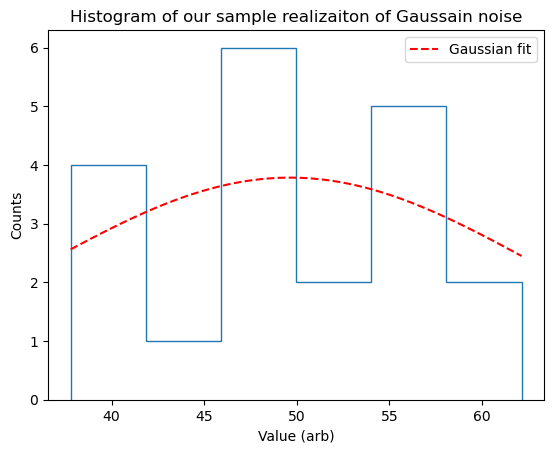

Fit parameters: 
A =  3.7857775875645108 +- 1.6313084092710843
X_mean = 49.633538851208364 +- 8.721435944183005
sigma =  13.411368316372474 +- 18.91800736873262


In [15]:
#Re-plot the data
plt.stairs(counts, bins)

#Make curves with the fit values
bins_fit=np.linspace(np.min(bins),np.max(bins),1000)
plt.plot(bins_fit,gaus(bins_fit,*param),'r--',label='Gaussian fit')
plt.legend()

plt.title("Histogram of our sample realizaiton of Gaussain noise")
plt.ylabel("Counts")
plt.xlabel("Value (arb)")
plt.show()

#print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("A = ", param[0], "+-",np.sqrt(param_cov_matrix[0,0]))
print("X_mean =", param[1], "+-",np.sqrt(param_cov_matrix[1,1]))
print("sigma = ", param[2], "+-",np.sqrt(param_cov_matrix[2,2]))

## Exercises
1. Re-run this code multiple times to generate new realizations of the Gaussian noise.  Note how in the limit of a small sample size (e.g., N=20) the agreement between the PDF is hard to estimate, and might differ significantly between the "Stats" and "Curve-fit" results.
1. Increase the sample size by factors of 10.   What sample size is required to know the mean and sigma to 1%, as determined by the fit parameters?  Fill out this table for the mean and std-dev for different values of N.
|$N-samples$  | Scipy | Curvefit|
| --- | --- | --- |
|$20$| XX$\pm$XX | XX$\pm$XX | 
|$100$| XX$\pm$XX | XX$\pm$XX | 
|$1000$| XX$\pm$XX | XX$\pm$XX | 